# ATTENTION: 

Remember to pull before any change and to push often! (Problem on merging)

# Test for project1, sandbox

In [59]:
%matplotlib inline
from Regressions import *
from proj1_helpers import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2

sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Train Data loading

In [2]:
y, x_all, ids = load_csv_data('../Data/train.csv')
y[y==-1] = 0

In [3]:
y_all = y
print('Y shape : ', y.shape)
print('X shape : ', x_all.shape)

Y shape :  (250000,)
X shape :  (250000, 30)


In [4]:
x = np.delete(x_all,[4,5,6,12,26,27,28],1)

 which Definition

In [5]:
which = range(28,29) #Change according to desired features in tests

### Scatter plots

In [6]:
for i in which:
    feature = x[:,i]
    if len(feature[feature==-999]) > 0: #If there is some misplaced value we do not include them in the scatterplot
        print("ATTENTION: missing values ({h}) in {i}th feature removed!".format(i=i, h = len(feature[feature==-999])))
    feature = feature[feature>-999]
    plt.scatter(feature, range(len(feature)))
    print("Scatter plot for {i}th feature :".format(i=i))
    plt.show()

IndexError: index 28 is out of bounds for axis 1 with size 23

### Histograms

In [7]:
def hist_plot(data,i):
    # An "interface" to matplotlib.axes.Axes.hist() method
    n, bins, patches = plt.hist(x=data, bins=50, color='#0504aa',
                                alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('{i}th feature'.format(i=i))
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    plt.ylim(top=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    plt.show()

In [8]:
for i in which:
    feature = data0[:,-1]
    feature = feature[feature>-999]
#     hist_plot(feature,i)
    sns.distplot(feature,bins=30,kde=True)
    plt.title('{i}th feature'.format(i=i))
    plt.show()

NameError: name 'data0' is not defined

### Single feature-response plots

In [ ]:
for i in which:
    print("Scatter plot for {i}th feature :".format(i=i))

    t = x[:,i]
    plt.scatter(t,y, alpha = 0.5)
    mean_x1 = np.mean(t[y == 1])
    mean_x0 = np.mean(t[y == -1])
    plt.plot(mean_x0,-1,"or")
    plt.plot(mean_x1,1,"or")
    plt.show()

### Feature boxplots
Visually check influence on response

In [ ]:
for i in which:
    feature = x[:,i]
    print("Boxplot for {i}th feature :".format(i=i))
    plt.xlim(left = np.min(feature[feature>-999])-0.5)
    plt.xlim(right = np.max(feature[feature>-999])+.5)
    #the mean is dispayed as a triangle
    yes_feat = feature[y==1]
    no_feat = feature[y==-1]
    plt.boxplot(yes_feat[yes_feat>-999],vert = False, positions=[0],showmeans=True)
    plt.boxplot(no_feat[no_feat>-999], vert = False, positions=[-.25], showmeans=True)
    plt.show()
    


### Features with "too many" -999

Checked to eventually remove them.

In [ ]:
for i in range(x.shape[1]):
    percentage = len(np.where(x[:,i] < -500)[0])/len(x[:,i])*100
    print("feature {i}: {percentage} of Na".format(i = i, percentage = percentage))

## explanation for deleting feature 19

due to high correlation between features 6,17,22, we decided to delete the feature 19 from our 
data set since it contained 39% of NANs

# Deletion feature 19

In [9]:
x = np.delete(x_all,[4,5,6,12,19,26,27,28],1)
print(x.shape, y.shape)

(250000, 22) (250000,)


# Inputation of the data 

we know that the features with missing variables are the 1, 19,20,21. Hence we only "treat" these ones by different methods

In [10]:
def inputation(data, method = "mean"):
    '''
    input the missing values with the different methods: mean,median
    
    example of use: data_inputed = inputation(data,method = "median")
    
    for the moment only treat the features number 1,19,20,21 but could be easily generalized if felt necessary
    '''
    
    features_treated = [1,19,20,21]
    
    if method == "mean":
        for i in features_treated:
            t = data[:,i]
            mean = np.mean(t[t != -999])
            data_inputed = data.copy()
            data_inputed[data_inputed == -999] = mean
        
        return data_inputed
    
    if method == "median":
        for i in features_treated:
            t = data[:,i]
            mean = np.median(t[t != -999])
            data_inputed = data.copy()
            data_inputed[data_inputed == -999] = mean
        
        return data_inputed
    
        

In [11]:
test_data = inputation(x,method = "mean")

In [12]:
test_data_1 = inputation(x,method = "median")

# Standardization of the data

In [13]:
def standardize_data(data):
    data = data.copy()
    for i in range(0,data.shape[1]):
        data[:,i],mean,variance = standardize(data[:,i])
    
    return data

In [14]:
test_data = standardize_data(test_data)
test_data_1 = standardize_data(test_data_1)

In [15]:
W,error = least_squares(y,test_data)

In [16]:
W1, error1 = least_squares(y,test_data_1)

In [17]:
print(max(abs(W-W1)),abs(error-error1))

0.9773489037267211 1.0874511871983294e-05


# Test with CV 

In [18]:
from Regressions import *

test_data is inputed with mean, and test_data_1 is inputed with median

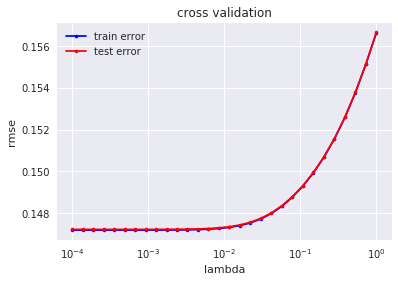

In [19]:
w,rmse_te,rmse_tr = cross_validation(y,test_data,k_fold = 5)

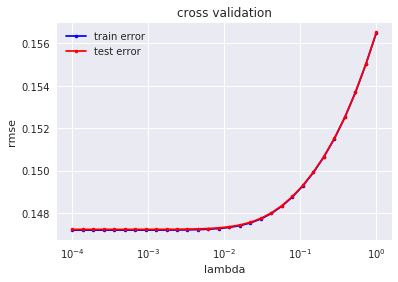

In [20]:
w1,rmse_te1,rmse_tr1 = cross_validation(y,test_data_1,k_fold = 5)

# Prediction test 

In [21]:
y_test, x_all_test, ids_test = load_csv_data('../Data/test.csv')

In [22]:
x_test = np.delete(x_all_test,[4,5,6,12,19,26,27,28],1)

In [23]:
x_test = inputation(x_test,method = "mean")
x_test = standardize_data(x_test)
x_all_test.shape

(568238, 30)

In [24]:
y_pred = predict_labels(W,x_test)

In [25]:
create_csv_submission(ids_test, y_pred, "../Data/test_Charles.csv")

# Test for a new method to predict

a particular interesting feature is the feature PRI_num_jet, the 17 in our case, 22nd feature in the all dataset

In [26]:
x_nj = x[:,17]
x_nj_0 = x_all[x_nj == 0]
x_nj_1 = x_all[x_nj == 1]
x_nj_2 = x_all[x_nj == 2]
x_nj_3 = x_all[x_nj == 3]



for i in range(30):
    per_0 = len(np.where(x_nj_0[:,i] < -500)[0])/len(x_nj_0[:,i])*100
    per_1 = len(np.where(x_nj_1[:,i] < -500)[0])/len(x_nj_1[:,i])*100
    per_2 = len(np.where(x_nj_2[:,i] < -500)[0])/len(x_nj_2[:,i])*100
    per_3 = len(np.where(x_nj_3[:,i] < -500)[0])/len(x_nj_3[:,i])*100
    
    if per_0 != 0 or per_1 != 0 or per_2 != 0 or per_3 != 0:
        print("feature {i}: {p}, {p1}, {p2}, {p3}".format(i = i, p = round(per_0,2), p1 = round(per_1,2),
                                                      p2 = round(per_2,2) ,p3 = round(per_3,2)))

feature 0: 26.15, 9.75, 5.86, 6.66
feature 4: 100.0, 100.0, 0.0, 0.0
feature 5: 100.0, 100.0, 0.0, 0.0
feature 6: 100.0, 100.0, 0.0, 0.0
feature 12: 100.0, 100.0, 0.0, 0.0
feature 23: 100.0, 0.0, 0.0, 0.0
feature 24: 100.0, 0.0, 0.0, 0.0
feature 25: 100.0, 0.0, 0.0, 0.0
feature 26: 100.0, 100.0, 0.0, 0.0
feature 27: 100.0, 100.0, 0.0, 0.0
feature 28: 100.0, 100.0, 0.0, 0.0


from this, we derive the hypothesis that in order to better predict the classification, one may use different models in function of the value of the PRI_num_jet: if the values are 2 or 3, there are almost no missing values

In [27]:
print(len(x_nj_0)/len(x_nj),len(x_nj_1)/len(x_nj),len(x_nj_2)/len(x_nj),len(x_nj_3)/len(x_nj))

0.399652 0.310176 0.201516 0.088656


This could at best predict more accurately for at most 30% of our data

def split_num_jet(data,y):
    '''

    num_jet0,y0,num_jet1,y1,num_jet2,y2 = split_num_jet(data)

    takes raw data (i.e all the covariates), then return three different dataset depending on the value of num_jet, after
    normalizing and doing inputation on the data

    return an empty array if there is no num_jet with the corresponding value

    the values 2 and 3 are merged since they do not seem to differ a lot and splitting between these two would make the
    data_set for the regression even smaller
    '''

    data = data.copy()
    y = y.copy()
    
    try :
        num_jet = data[:,22]
    except :
        num_jet = data[22]
    
    
    #split the data depending on the value of num_jet
    data_n2 = np.vstack((data[num_jet == 2], data[num_jet == 3]))
    y2a = y[num_jet == 2].reshape(len(np.where(num_jet== 2)[0]),1)
    y2b = y[num_jet == 3].reshape(len(np.where(num_jet== 3)[0]),1)
    y2 = np.vstack((y2a,y2b))
    data_n0 = data[num_jet == 0]
    y0 = y[num_jet == 0]
    y0.reshape(len(y0),1)
    data_n1 = data[num_jet == 1]
    y1 = y[num_jet == 1]
    y1 = y1.reshape(len(y1),1)
    
    data_n0 = inputation(data_n0,features_treated = [0])
    data_n1 = inputation(data_n1,features_treated = [0])
    data_n2 = inputation(data_n2,features_treated = [0])
    
    #delete the features with 100% of NA depending on the value if num_jet, plud deletion of the feature num_jet
    data_n0_modified = np.delete(data_n0,[4,6,12,23,24,25,26,27,28,22],1)
    data_n1_modified = np.delete(data_n1,[4,5,6,12,26,27,28,22],1)
    data_n2_modified = np.delete(data_n2,[22],1)
    
    
    data_n1_modified = standardize_data(data_n1_modified)
    data_n2_modified = standardize_data(data_n2_modified)
    data_n0_modified = standardize_data(data_n0_modified)
    
    return data_n0_modified,y0,data_n1_modified,y1,data_n2_modified,y2


In [29]:
data0,y0, data1,y1, data2,y2 = split_num_jet_test(x_all,y)

since the matrix has a row of 0 at the end, we don't care for it (no information given) and deleting it allows us to have an invertible matrix

In [30]:
data0_test = np.delete(data0,[data0.shape[1]-1],1)

In [31]:
w1,error1 = least_squares(y1,data1)

In [32]:
w0,error0 = least_squares(y0,data0_test)

In [33]:
w2,error2 = least_squares(y2,data2)

In [65]:
def predict_multiple_models(matrix,w0,w1,w2,ids):
    
    #in the process of cutting the data in different parts with split_num_jet
    if w0.shape[0]==19:
        w0 = np.append(w0,[0])
    
    #we split the data depending on the different values of num_jet
    data0,id0, data1,id1, data2,id2 = split_num_jet(matrix,ids)
    
    #we predict separatly using the different models
    y0 = predict_labels(w0,data0)
    y1 = predict_labels(w1,data1)
    y2 = predict_labels(w2,data2)
    
    #we merge the prediction to return a single vector of predictions and a vector of ids
    y0 = y0.reshape(len(y0),1)
    y1 = y1.reshape(len(y1),1)
    y2 = y2.reshape(len(y2),1)
    id0 = id0.reshape(len(id0),1)
    id1 = id1.reshape(len(id1),1)
    id2 = id2.reshape(len(id2),1)

    y = np.vstack((y0,y1,y2))
    ids_new = np.vstack((id0,id1,id2))
    
    #merge and sort so the indices are in the right order for the ouput
    predictions = np.hstack((y,ids_new))
    predictions[np.lexsort((predictions[:,0],predictions[:,1]))]
    y = predictions[:,0]
    ids_new = predictions[:,1]
    
    return y,ids_new
    
    

In [66]:
y_test,ids_test = predict_multiple_models(x_all_test,w0,w1,w2,ids_test)

(227458, 20) (175338, 22) (165442, 29)
(20,) (22, 1) (29, 1)
